<a href="https://colab.research.google.com/github/gurleenk01/python/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv')

In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df=df.drop(['company'],axis=1)

In [8]:
df.shape

(119390, 31)

In [9]:
median1=df['children'].median()

In [10]:
median1

0.0

In [11]:
df['children'].replace(np.nan,median1,inplace=True)

In [13]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [17]:
median2=df['agent'].median()

In [18]:
df['agent'].replace(np.nan,median2,inplace=True)

In [19]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [20]:
mode1=df['country'].mode().values[0]
df['country'].replace(np.nan,mode1,inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [21]:
duplicate=df.duplicated()


In [22]:
duplicate.sum()

32020

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.shape

(87370, 31)

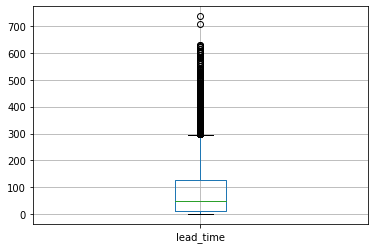

In [25]:
df.boxplot(['lead_time'])

In [26]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lower_range=q1-1.5*IQR
  high_range=q3+1.5*IQR
  return lower_range,high_range

In [27]:
low,high=remove_outlier(df['lead_time'])
df['lead_time']=np.where(df['lead_time']>high,high,df['lead_time'])
df['lead_time']=np.where(df['lead_time']<low,low,df['lead_time'])

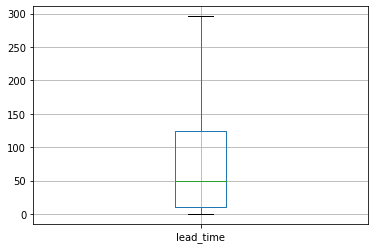

In [28]:
df.boxplot(['lead_time'])

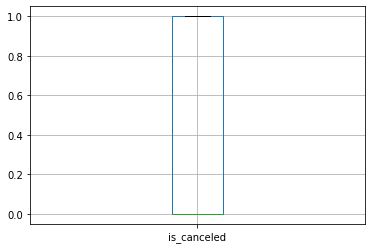